# Multimodal Transformer Model - MOSEI

In this notebook, we implement the MulT Model (Multimodal Transformer for Unaligned Multimodal Language Sequences), and test it on CMU-MOSEI dataset.

## Importing Libraries

In [1]:
import os
import sys
import torch

import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

## Importing Helper Functions

In [2]:
from helpers.data.get_data import get_dataloader
from helpers.unimodals.common_models import Identity, MLP
from helpers.fusions.mult import MULTModel
from helpers.fusions.common_fusions import Concat
from helpers.training.supervised_learning import train, test
from helpers.utils.common_utils import get_default_device, save_results

## Loading the Dataset

In [3]:
traindata, validdata, testdata = get_dataloader('data/mosei_senti_data.pkl', robust_test=False, max_pad=True)

In [4]:
device = get_default_device()
print(device)

cuda


## Model Architecture

In [5]:
class HParams():
    num_heads = 8
    layers = 4
    attn_dropout = 0.1
    attn_dropout_modalities = [0, 0, 0.1]
    relu_dropout = 0.1
    res_dropout = 0.1
    out_dropout = 0.1
    embed_dropout = 0.2
    embed_dim = 40
    attn_mask = True
    output_dim = 1
    all_steps = False

In [6]:
encoders = [
    Identity().to(device), 
    Identity().to(device), 
    Identity().to(device),
    
]

fusion = MULTModel(3, [35, 74, 300], hyp_params=HParams).to(device)

head = Identity().to(device)

## Training

In [13]:
FILE_NAME = 'mosei_mult_r0'

In [ ]:
train_losses, valid_losses = train(
    encoders, fusion, head, traindata, validdata, 100, 
    task="regression", optimtype=torch.optim.AdamW, early_stop=False, is_packed=False, 
    lr=1e-3, clip_val=1.0, save=f'models/{FILE_NAME}.pt', 
    weight_decay=0.01, objective=torch.nn.L1Loss())

Epoch [1/100]
Train Loss: 0.7846
Valid Loss: 0.6703
Saving Best

Epoch [2/100]
Train Loss: 0.6820
Valid Loss: 0.6409
Saving Best

Epoch [3/100]
Train Loss: 0.6502
Valid Loss: 0.6256
Saving Best

Epoch [4/100]
Train Loss: 0.6388
Valid Loss: 0.6497

Epoch [5/100]
Train Loss: 0.6278
Valid Loss: 0.6730

Epoch [6/100]
Train Loss: 0.6163
Valid Loss: 0.6527

Epoch [7/100]
Train Loss: 0.6129
Valid Loss: 0.6425

Epoch [8/100]
Train Loss: 0.6010
Valid Loss: 0.6777

Epoch [9/100]
Train Loss: 0.5967
Valid Loss: 0.6066
Saving Best

Epoch [10/100]
Train Loss: 0.5842
Valid Loss: 0.6231

Epoch [11/100]
Train Loss: 0.5821
Valid Loss: 0.6245

Epoch [12/100]
Train Loss: 0.5785
Valid Loss: 0.6348

Epoch [13/100]
Train Loss: 0.5730
Valid Loss: 0.6197

Epoch [14/100]
Train Loss: 0.5672
Valid Loss: 0.6745

Epoch [15/100]
Train Loss: 0.5574
Valid Loss: 0.6444

Epoch [16/100]
Train Loss: 0.5597
Valid Loss: 0.6278

Epoch [17/100]
Train Loss: 0.5528
Valid Loss: 0.6143

Epoch [18/100]
Train Loss: 0.5477
Valid Los

Text(0.5, 1.0, 'Loss vs. No. of epochs')

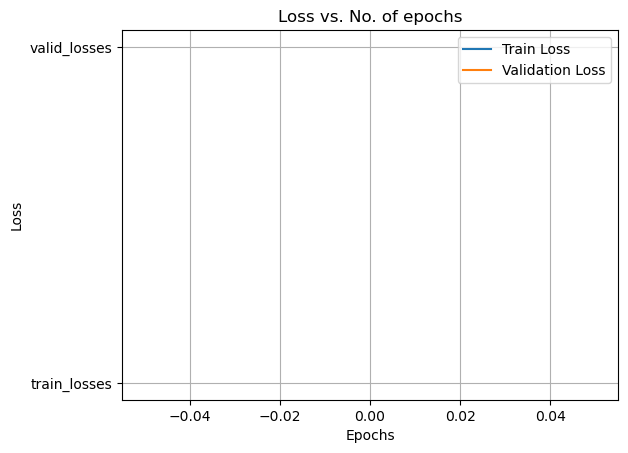

In [15]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')

In [ ]:
save_results(train_losses, valid_losses, f'results/{FILE_NAME}.pkl')

## Testing

In [9]:
model = torch.load(f'models/{FILE_NAME}.pt').to(device)

test(model, test_dataloaders_all=testdata, dataset='mosi', is_packed=False,
     criterion=torch.nn.L1Loss(), task='posneg-classification', no_robust=True)

Recall: 80.1934% | Total Accuracy: 71.9147%
Inference Time: 13s73ms
Inference Params: 3080321


In [16]:
import pickle

def load_results(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return data

# Example usage:
result = load_results(f'results/{FILE_NAME}.pkl')

In [19]:
train_losses = result['train_losses']

In [20]:
test_losses = result['_losses']

KeyError: 'test_losses'